In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
# Load dataset
df = pd.read_csv('Dataset\Customer Churn.csv')  # Replace with your dataset file

# General overview
print("Dataset Overview:")
print(df.info())
print("\nMissing Values Count:\n", df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: flo

In [28]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :] = imputer.fit_transform(df)

In [29]:
# Convert target variable (Churn) to integer if not already
df['Churn'] = df['Churn'].astype(int)

# 1. Basic EDA
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.0

C:\Users\rishe\AppData\Local\Temp\ipykernel_37648\1021764257.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=axes,color='green');


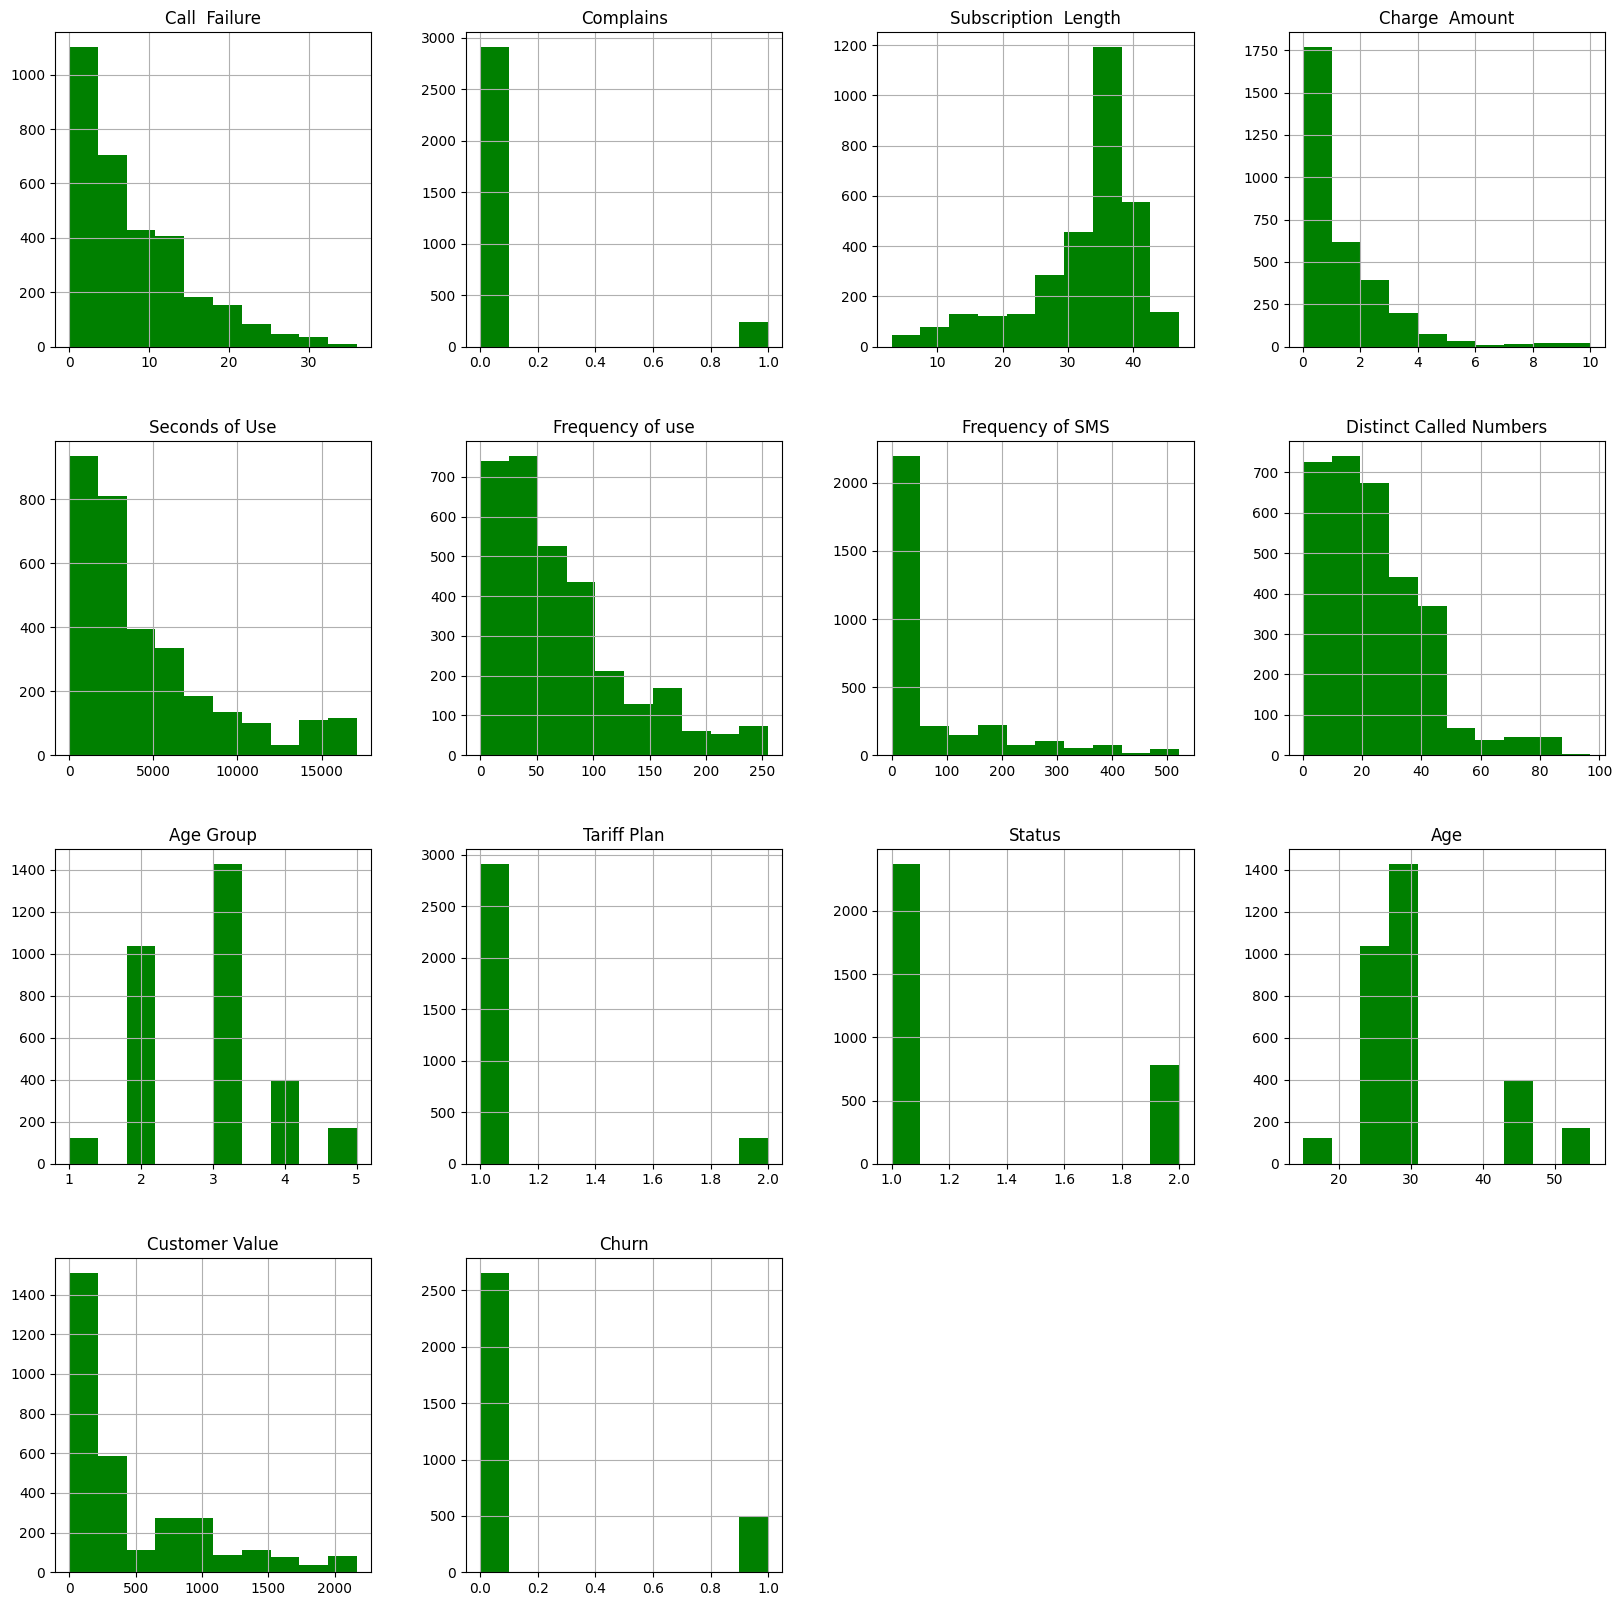

In [30]:
figure, axes = plt.subplots(figsize=(20, 20))
df.hist(ax=axes,color='green');

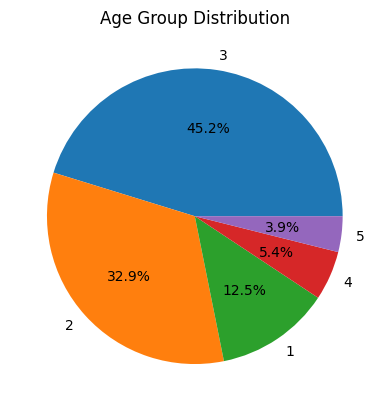

In [31]:
figure1, axes1 = plt.subplots()
axes1.pie(df['Age Group'].value_counts(), labels=df['Age Group'].unique(), autopct='%1.1f%%')
axes1.set_title('Age Group Distribution');

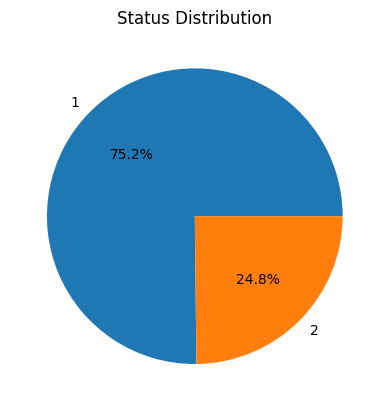

In [32]:
# Pie chart for Status
figure4, axes4 = plt.subplots()
axes4.pie(df['Status'].value_counts(), labels=df['Status'].unique(), autopct='%1.1f%%')
axes4.set_title('Status Distribution');

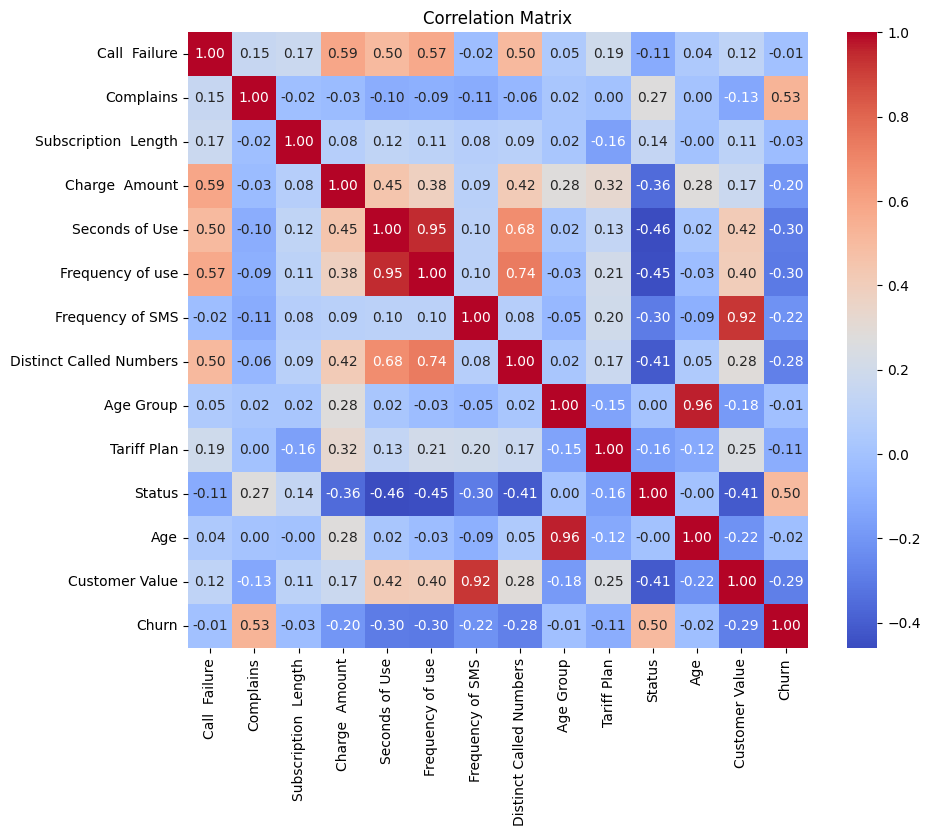

In [33]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [34]:
# 7. High-Risk Customer Analysis
threshold_call_failure = df['Call  Failure'].mean()
print(threshold_call_failure)
high_risk_customers = df[(df['Call  Failure'] > threshold_call_failure) & (df['Complains'] == 1)]
print(f"\nHigh-Risk Customers Count: {len(high_risk_customers)}")
print(f"High-Risk Churn Rate: {high_risk_customers['Churn'].mean() * 100:.2f}%")

# 8. Export Results for Further Reporting

high_risk_customers.to_csv("high_risk_customers.csv", index=False)

7.627936507936508

High-Risk Customers Count: 145
High-Risk Churn Rate: 75.17%


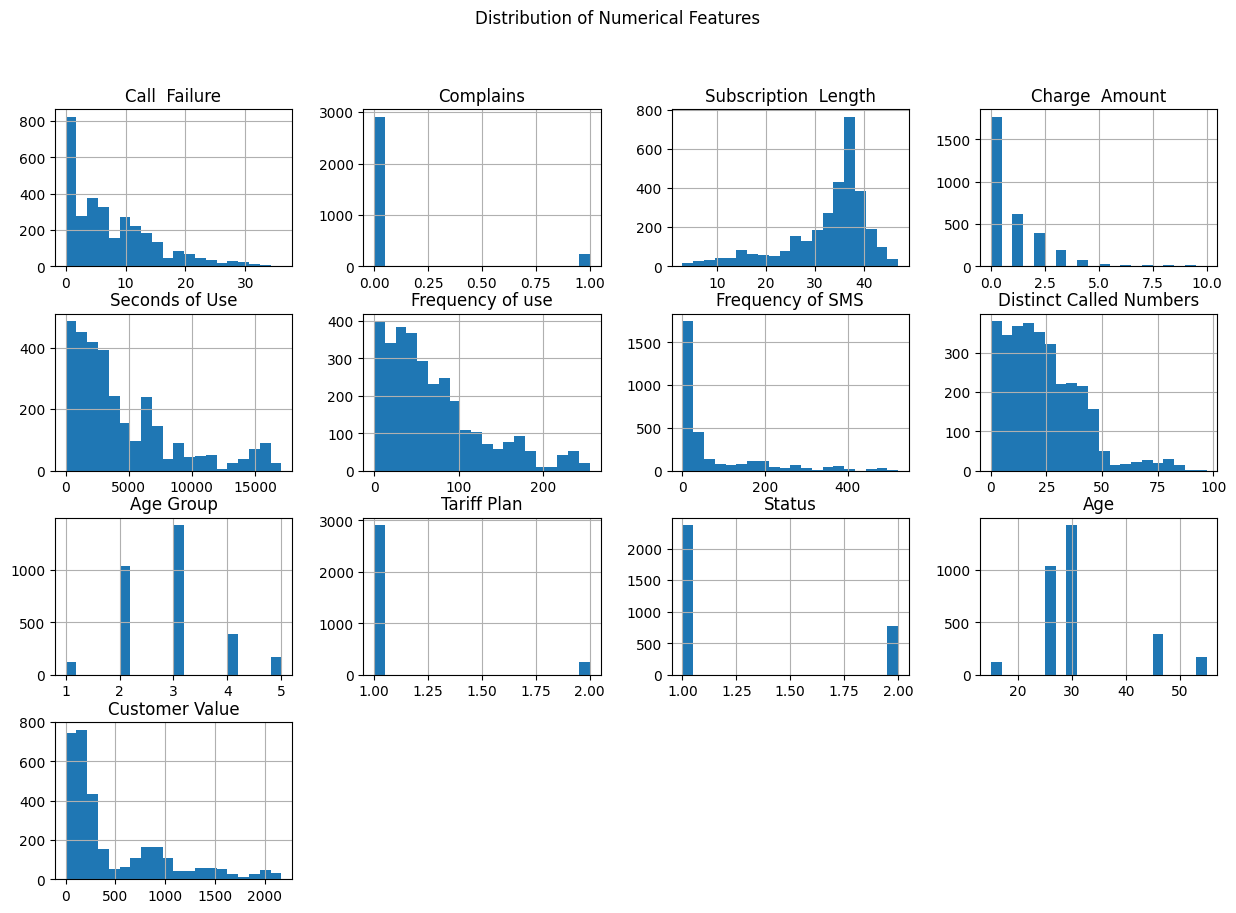

<Figure size 1000x600 with 0 Axes>

In [35]:
# 1. **Distribution of Features**

# Distribution of numerical variables
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(10, 6))
for col in categorical_features:
    plt.subplot(2, 3, categorical_features.get_loc(col) + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

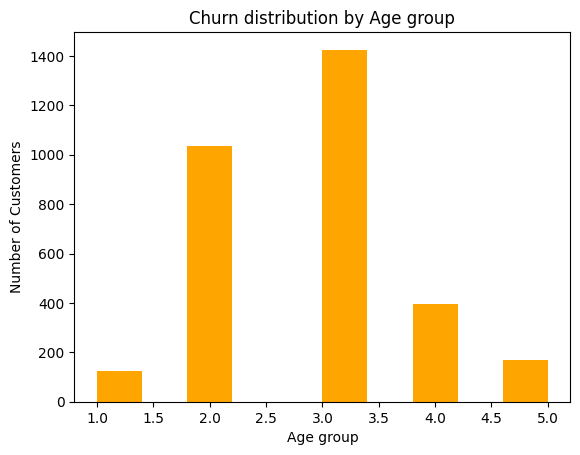

In [36]:
# Group the data by age group and count the number of churn and non-churn customers
age_group_churn = df.groupby(['Age Group', 'Churn']).size().reset_index(name='count')
# Plot the histogram
figure13, axes13 = plt.subplots()
axes13.hist(age_group_churn['Age Group'], weights=age_group_churn['count'], stacked=True, color='orange')
axes13.set_xlabel('Age group')
axes13.set_ylabel('Number of Customers')
axes13.set_title('Churn distribution by Age group');

In [37]:


# Hypothesis Testing: Check if Churn varies by Tariff Plan
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Tariff Plan'], df['Churn'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\n--- Chi-Squared Test (Tariff Plan vs Churn) ---")
print(f"Chi-Squared Stat: {chi2_stat}, P-value: {p_val}")



--- Chi-Squared Test (Tariff Plan vs Churn) ---
Chi-Squared Stat: 34.21761003954184, P-value: 4.928097701198338e-09
